### 為什麼需要 OneHotEncoder

1. **轉換類別變數**：
   - 類別變數不能直接用於大多數機器學習模型，需要將其轉換為數值型。
   - OneHotEncoder 將每個類別變數轉換為多個二進位變數，使模型能夠理解並利用這些特徵。

2. **避免引入順序關係**：
   - 將類別變數轉換為數字（如使用 LabelEncoder）可能會引入不必要的順序關係，而 OneHotEncoder 避免了這一點。
   - 保證了每個類別之間的獨立性，不會因為數值大小而影響模型的預測。

3. **提高模型性能**：
   - 對於很多模型來說，使用 OneHotEncoder 編碼後的特徵可以提高模型的性能，因為它能更好地表示數據的結構和模式。

原始資料如下:


### 原始資料

|    | Color |
|----|-------|
| 0  | Red   |
| 1  | Green |
| 2  | Blue  |
| 3  | Green |
| 4  | Red   |

### 把顏色對應到數字(LabelEncoder) 結果

|    | Color | Color_Label |
|----|-------|-------------|
| 0  | Red   | 2           |
| 1  | Green | 1           |
| 2  | Blue  | 0           |
| 3  | Green | 1           |
| 4  | Red   | 2           |

### OneHotEncoder 結果

|    | Color | Color_Red | Color_Green | Color_Blue |
|----|-------|-----------|-------------|------------|
| 0  | Red   | 1         | 0           | 0          |
| 1  | Green | 0         | 1           | 0          |
| 2  | Blue  | 0         | 0           | 1          |
| 3  | Green | 0         | 1           | 0          |
| 4  | Red   | 1         | 0           | 0          |

## LabelEncoder 

#### 將類別標籤轉換為數字編碼，適用於有順序關係的類別變數。

In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data = pd.DataFrame({
    'Fruits': [ 'Kewi','Apple','Banana', 'Cherry'],
})
le = LabelEncoder()
data["Fruit_numer"] = le.fit_transform(data["Fruits"])
data

,Fruits,Fruit_numer
0,Kewi,3
1,Apple,0
2,Banana,1
3,Cherry,2


## OneHotEncoder

In [61]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [62]:
# 建立一個範例 DataFrame
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})

In [63]:
ohe = OneHotEncoder()
on_hot_code =  ohe.fit_transform(data[["Color"]])
print(on_hot_code)

  (0, 2)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 1)	1.0
  (4, 2)	1.0


In [64]:
ohe = OneHotEncoder(sparse_output=False)
on_hot_code = ohe.fit_transform(data[["Color"]])
print(on_hot_code)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [65]:
colName = ohe.get_feature_names_out(["Color"])
print(colName)
one_hot_df = pd.DataFrame(on_hot_code,columns=colName)
print(one_hot_df)

['Color_Blue' 'Color_Green' 'Color_Red']
   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         0.0          1.0        0.0
2         1.0          0.0        0.0
3         0.0          1.0        0.0
4         0.0          0.0        1.0


In [66]:
data = data.join(one_hot_df)
data

,Color,Color_Blue,Color_Green,Color_Red
0,Red,0.0,0.0,1.0
1,Green,0.0,1.0,0.0
2,Blue,1.0,0.0,0.0
3,Green,0.0,1.0,0.0
4,Red,0.0,0.0,1.0


In [67]:
import pandas as pd
# 建立一個範例 DataFrame
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})
one_hot_df = pd.get_dummies(data,columns=["Color"])
print(one_hot_df)
one_hot_df_int = one_hot_df.astype(int)
print(one_hot_df_int)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True
   Color_Blue  Color_Green  Color_Red
0           0            0          1
1           0            1          0
2           1            0          0
3           0            1          0
4           0            0          1


## 共線(Collinearity)

In [68]:
import pandas as pd
# 建立一個範例 DataFrame
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})
one_hot_df = pd.get_dummies(data,columns=["Color"],drop_first=True)
one_hot_df =  one_hot_df.astype(int)
one_hot_df

,Color_Green,Color_Red
0,0,1
1,1,0
2,0,0
3,1,0
4,0,1


在數據分析和機器學習中，數據類型可以大致分為以下幾種，每種都有其特定的用途和處理方式：

1. **類別數據（Categorical Data）**
   - **說明**：表示不同類別或群組的數據，通常是非數值的。
   - **案例**：性別（男、女）、血型（A、B、AB、O）、產品類型（家具、電子產品、服裝）。

2. **數值數據（Numerical Data）**
   - 分為兩種：
     - **連續數據（Continuous Data）**
       - **說明**：可以在一定範圍內任意細分的數據。
       - **案例**：身高、體重、溫度、股票價格。
     - **離散數據（Discrete Data）**
       - **說明**：具體的整數值，不可以細分。
       - **案例**：班上學生人數、公司員工數、一天中的客戶服務電話次數。

3. **時間數據（Time Series Data）**
   - **說明**：按時間順序排列的數據點序列，通常每個數據點都有一個時間戳。
   - **案例**：每日股市收盤價、每小時天氣記錄、月銷售數據。

4. **文字數據（Text Data）**
   - **說明**：由字、詞、句子構成的數據，通常需要特殊的處理方式如自然語言處理（NLP）。
   - **案例**：商品評論、新聞文章、社交媒體帖子。

5. **布爾數據（Boolean Data）**
   - **說明**：表示是或否的二元數據。
   - **案例**：是否已婚（是、否）、是否訂閱電子報（是、否）。

6. **序列數據（Ordinal Data）**
   - **說明**：類別數據的一種，但類別之間存在自然排序或等級。
   - **案例**：滿意度調查（不滿意、一般、滿意、非常滿意）、教育程度（小學、中學、大學、研究生）。

這些數據類型在數據分析和機器學習中扮演著關鍵角色，根據數據的特性選擇適當的處理方式對於獲得有效的分析結果至關重要。

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("./Ames_NO_Missing_Data.csv")
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

當我們將類別數據以數字形式編碼時需要小心。我們需要確保數字之間的關係對模型來說是有意義的。例如，MSSubClass 的編碼本質上只是每個類別的數字代碼：

**MSSubClass: 住宅類型。**

- **20**	1-STOREY 1946 & NEWER ALL STYLES 一層樓 1946年及以後所有風格
- **30**	1-STOREY 1945 & OLDER 一層樓 1945年及更早
- **40**	1-STOREY W/FINISHED ATTIC ALL AGES 一層樓帶完成的閣樓 所有年齡
- **45**	1-1/2 STORY - UNFINISHED ALL AGES 一層半未完成 所有年齡
- **50**	1-1/2 STORY FINISHED ALL AGES 一層半完成 所有年齡
- **60**	2-STORY 1946 & NEWER 二層樓 1946年及以後
- **70**	2-STORY 1945 & OLDER 二層樓 1945年及更早
- **75**	2-1/2 STORY ALL AGES 二層半 所有年齡
- **80**	SPLIT OR MULTI-LEVEL 分割或多層
- **85**	SPLIT FOYER 分割門廳
- **90**	DUPLEX - ALL STYLES AND AGES 雙拼 - 所有風格和年齡
- **120**	1-STORY PUD (Planned Unit Development) - 1946 & NEWER 一層樓PUD（計劃單元開發）- 1946年及以後
- **150**	1-1/2 STORY PUD - ALL AGES 一層半PUD - 所有年齡
- **160**	2-STORY PUD - 1946 & NEWER 二層樓PUD - 1946年及以後
- **180**	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER PUD - 多層 - 包括分割層/門廳
- **190**	2 FAMILY CONVERSION - ALL STYLES AND AGES 兩家庭改造 - 所有風格和年齡

數字本身似乎並無與其他數字相關。雖然 30 > 20 是對的，但“1-STOREY 1945 & OLDER” > “1-STOREY 1946 & NEWER ALL STYLES”實際上並無意義。需要注意的是，這並不總是這樣，例如將頭等艙和二等艙編碼為 1 和 2 的情況。確保你完全理解你的數據集，以檢查需要轉換/更改的內容。

In [72]:
df["MS SubClass"] = df["MS SubClass"].astype(str)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   object 
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

In [74]:
df_nums = df.select_dtypes(exclude=["object"])#排除物件類型
df_objs = df.select_dtypes(include=["object"])#只保留物件類型
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath     

In [75]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    1152 non-null   object
 18  Exter Qu

In [76]:
df_objs = pd.get_dummies(df_objs,drop_first=True)
df_objs = df_objs.astype(int)
df_objs

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2921,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [77]:
fial_df = df_nums.join(df_objs)
fial_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [78]:
fial_df2 = pd.concat([df_nums,df_objs],axis=1)
fial_df2

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0



### 1. 均方誤差（MSE, Mean Squared Error）
MSE 是所有預測值和實際值之間差異的平方和的平均值。公式如下：

$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$

其中：
- $( n )$ 是樣本數
- $( y_i )$ 是實際值
- $( \hat{y}_i )$ 是預測值

### 2. 均方根誤差（RMSE, Root Mean Squared Error）
RMSE 是 MSE 的平方根。公式如下：

$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$

### 3. 平均絕對誤差（MAE, Mean Absolute Error）
MAE 是所有預測值和實際值之間差異的絕對值的平均值。公式如下：

$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$

這些誤差指標用於評估回歸模型的性能。MSE 和 RMSE 更加敏感於大的誤差，因為它們對誤差進行平方。MAE 則提供了預測值和實際值之間差異的平均大小。


In [79]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [80]:
california = datasets.fetch_california_housing()
X = california.data
y = california.target
print(X)
print(y)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [83]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("MSE:",mse)
print("MAE:",mae)

MSE: 0.555891598695242
MAE: 0.5332001304956991


## Cross Validation with cross_val_score 交叉驗證
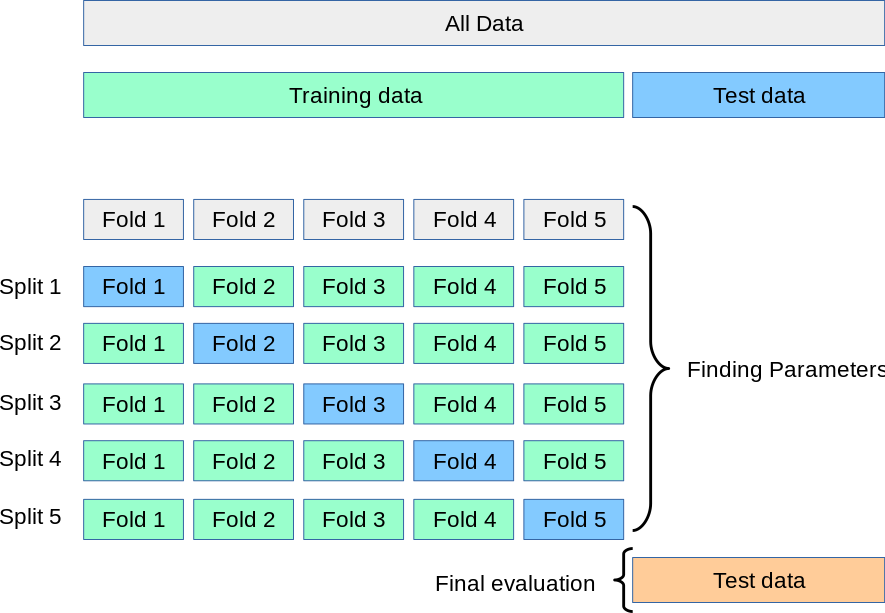

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [86]:
from sklearn.model_selection import train_test_split
X = df.drop("sales",axis=1)
y = df["sales"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


### StandardScaler 是一種常見的特徵縮放方法，用於將數據進行標準化，使其具有零均值和單位方差。其公式如下：

### 公式

給定一個特徵值 $( x )$，標準化後的特徵值 $( x' )$ 計算公式如下：

$[ x' = \frac{x - \mu}{\sigma} ]$

其中：
- $( x )$ 是原始特徵值
- $( \mu )$ 是該特徵在訓練數據中的平均值
- $( \sigma )$ 是該特徵在訓練數據中的標準差

### 具體步驟

1. **計算均值 ($( \mu )$)**：
   - 對於特徵 $( x )$，計算其所有樣本的平均值：
   $[ \mu = \frac{1}{N} \sum_{i=1}^{N} x_i ]$
   其中 $( N )$ 是樣本數量，$( x_i )$ 是第 $( i )$ 個樣本的特徵值。

2. **計算標準差 ($( \sigma )$)**：
   - 對於特徵 $( x )$，計算其所有樣本的標準差：
   $[ \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2} ]$

3. **標準化每個特徵值**：
   - 對於每個特徵值 $( x )$，使用上面的公式計算標準化後的值 $( x' )$：
   $[ x' = \frac{x - \mu}{\sigma} ]$

這樣就完成了數據的標準化處理，使其具有零均值和單位方差。

## 特徵縮放

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [89]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,X_train,y_train,cv=5,scoring="neg_mean_squared_error")
print(score)
print(abs(score.mean()) )

[-4.19295353 -1.50064402 -2.10907967 -2.54135514 -4.37293066]
2.943392602590042


## 作業 使用X_test預測 算出mse